<a href="https://colab.research.google.com/github/srinivasrdhkrshnn/CS6910_Assignment_1/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_type = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 
x_train.shape

(60000, 28, 28)

Sample Images for each Class :


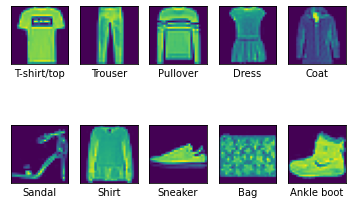

In [ ]:

print("Sample Images for each Class :")

for i in range(10):
  plt.subplot(2,5,i+1)
  for j in range(len(y_train)):
    if y_train[j] == i :
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x_train[j])
      plt.xlabel(class_type[y_train[j]])
      break      
plt.show()

In [ ]:
def activate(x,activation):                                          # Hidden layer activation function                                  

  if activation == "sigmoid":
    return 1/(1 + np.exp(-x))

  elif activation == "tanh": 
    return np.tanh(x) 

  elif activation == "relu": 
    return x * (x > 0) 

def softmax(x):                                                      # Output activation function
    return np.exp(x) / np.sum(np.exp(x), axis=0) 

def feed_forward(x,parameters,input_size,output_size):                                # feed-forward data through the network to estimate output
  
  sizes = [input_size] + hl_size
  sizes = hl_size + [output_size]
  layers = len(sizes)
  
  H_old = x
  H = {}
  H[0] = x

  for i in range(1,len(sizes)-1):
    W = parameters["W"+str(i)]
    b = parameters["b"+str(i)]
    A[i] = np.dot(W,H_old)+b
    H[i] = activate(A[i],activation)
    H_old = H[i]

  W = parameters["W"+str(len(sizes)-1)]
  b = parameters["b"+str(len(sizes)-1)]
  A[len(sizes)-1] = np.dot(W,H_old)+b
  y_hat = softmax(A[len(sizes)-1])

  return y_hat,A,H

def loss_compute(y,y_hat,parameters):                                # function to compute the loss/error (both squared error and cross entropy)

  if (loss == "squared_error"):
    error = np.sum((y-y_hat)**2)/(2*len(y))
  elif (loss == "cross_entropy") :
    error = -1*np.sum(np.multiply(y,np.log(y_hat)))/len(y)
		
  L = int(len(parameters)/2)
  reg_error = 0.0                                                    # account for regularization to avoid overfit of data - L2 norm regularization
  for i in range(1,L+1) :
    reg_error = reg_error + (reg/(2*len(y)))*np.sum(np.square(parameters["W"+str(i)])) 
  error = error + reg_error

  return error



In [ ]:
def derivative(x,activation):                                        # function to compute the derivative of hidden layer activation fn

  if activation == "sigmoid":
    return activate(x,"sigmoid")*(1-activate(x,"sigmoid"))
  elif activation == "tanh": 
    return 1. - x * x 
  elif activation == "relu": 
    return 1. * (x > 0)

def grad_init(input_size,output_size):
  
  sizes = [input_size] + hl_size
  sizes = hl_size + [output_size]
  layers = len(sizes)

  for i in range(1,layers):
    grads["dW" + str(i)] = np.zeros((sizes[i], sizes[i-1]))
    grads["db" + str(i)] = np.zeros((sizes[i],1))

  return grads  


def back_prop(x,y,y_hat,prev_grad,A,H,parameters,input_size,output_size) :     # back-propogation rule to compute the gradients of activation, pre-activation and parameters
  
  sizes = [input_size] + hl_size
  sizes = hl_size + [output_size] 

  layers = len(sizes)
  new_grad = {}
  grads = {"dH0":np.zeros((input_size,1)),"dA0":np.zeros((input_size,1))}
  for i in range(1,layers):
    grads["dW" + str(i)] = np.zeros((sizes[i], sizes[i-1]))
    grads["db" + str(i)] = np.zeros((sizes[i],1))
    grads["dA" + str(i)] = np.zeros((sizes[i],1))
    grads["dH" + str(i)] = np.zeros((sizes[i],1))

  if loss == "squared_error":
    grads["dH"+str(layers-1)] = (Y_hat-Y)
    grads["dA"+str(layers-1)] = (Yhat - Y)*Yhat - Yhat*(np.dot(np.transpose((Yhat-Y)), Yhat))

  elif loss=="cross_entropy" :
    grads["dH"+str(layers-1)] = -(Y/Y_hat)
    grads["dA"+str(layers-1)] = -(Y-Y_hat)

  for i in np.arange(layers-1, 0, -1):
    grads["dW" + str(i)] = np.dot(grads["dA" + str(i)], np.transpose(H[i-1]))
    grads["db" + str(i)] = grads["dA" + str(i)]
    grads["dH" + str(i-1)] = np.dot(np.transpose(parameters["W" + str(i)]), grads["dA" + str(i)])
    grads["dA" + str(i-1)] = np.multiply((grads["dH" + str(i-1)]),derivative(A[i-1],activation))
  
  for i in range(1,n_hiddenlayer+1):
    new_grad["dW" + str(i)] = grads["dW" + str(i)] + prev_grad["dW" + str(i)]
    new_grad["db" + str(i)] = grads["db" + str(i)] + prev_grad["db" + str(i)]
    
  return new_grad  

In [60]:
# Initializations

# Data
X_train = np.array(x_train.reshape(x_train.shape[0], 784,1))         # reshape 2-D data to 1-D
X_test = np.array(x_test.reshape(x_test.shape[0], 784,1))            # reshape 2-D data to 1-D

def normalize_data(x):                                               # normalize input data
  x_norm = x.astype('float32')
  x_norm = x_norm / 255.0  
  return x_norm 

X_train = normalize_data(X_train)
X_val = X_train[-6000:]                                             # validation set input
X_train = X_train[0:54000]                                          # training set input
X_test = normalize_data(X_test)                                     # test set input


Y_train = np.zeros([len(y_train),10,1])
Y_test = np.zeros([len(y_test),10,1])

for i in range(len(y_train)):                                        # convert y from just a class number to an indicator vector (10x1)
  y = np.zeros([10, 1])
  y[y_train[i]] = 1.0
  Y_train[i] = y

Y_val = Y_train[-6000:]                                              # validation set output
Y_train = Y_train[0:54000]                                           # training set output

for i in range(len(y_test)):                                         # convert y from just a class number to an indicator vector (10x1)
  y = np.zeros([10, 1])
  y[y_test[i]] = 1.0
  Y_test[i] = y                                                      # test set output

input_size = 784                                                     # length of input
output_size = 10                                                     # length of output

# hyperparameters
n_epoch = 5                                                          # number of epochs
n_hiddenlayer = 3                                                    # number of hidden layers
hl_size = np.array([128,64,32])                                      # size(no. of neurons) in each hidden layer
assert len(hl_size) == n_hiddenlayer                    
reg = 0.005                                                          # weight_decay (L2 regularization)
lr = 1e-3                                                            # learning rate                                
optimizer = "sgd"                                                    # optimization function used
bs = 32                                                              # batch size
w_init = "random"                                                    # weight initialization
activation = "sigmoid"                                               # activation function used
loss = "cross_entropy"                                               # measure of loss (squared_error/cross_entropy)

                                                                     # parameters
def network_init(input_size,output_size):                            # function to initialize weights and biases
  sizes = [input_size] + hl_size 
  sizes = hl_size + [output_size]
  parameters = {}

  for i in range(1, len(sizes)):
    if w_init == "xavier" :
      parameters["W" + str(i)] = np.random.randn(sizes[i], sizes[i-1])*np.sqrt(2./(sizes[i] + sizes[i-1]))
      parameters["b" + str(i)] = np.zeros((sizes[i],1))
    elif w_init == "random" :
      parameters["W" + str(i)] = np.random.rand(sizes[i], sizes[i-1])
      parameters["b" + str(i)] = np.random.rand(sizes[i],1)

  return parameters,sizes  

def update_init(input_size,output_size) :
  sizes = [input_size] + hl_size 
  sizes = hl_size + [output_size]
  update = {}
  for i in range(1,len(sizes)):
   update["W"+str(i)] = np.zeros((sizes[i],sizes[i-1]))
   update["b"+str(i)] = np.zeros((sizes[i],1))

  return update  


In [59]:
def momentum_GD(X,Y,minibatch_size) :

   parameters,sizes = network_init(input_size,output_size)
   update = update_init(input_size,output_size)
   gamma = 0.9

   for n in range(n_epoch):
     grads = grad_init(input_size,output_size)

     for i in range(0, X_train.shape[0], minibatch_size):
       X_mini = X[i:i + minibatch_size]
       Y_mini = Y[i:i + minibatch_size]

       for x,y in zip(X,Y):
         y_hat,A,H = feed_forward(x,parameters,input_size,output_size)
         grads = back_prop(x,y,y_hat,grads,A,H,parameters,input_size,output_size)

       for i in range(1,n_hiddenlayer+1) :
         update["W"+str(i)] = gamma*update["W"+str(i)] + lr*grads["dW"+str(i)]
         update["b"+str(i)] = gamma*update["b"+str(i)] + lr*grads["db"+str(i)]
         parameters["W"+str(i)] = parameters["W"+str(i)] - update["W"+str(i)]
         parameters["b"+str(i)] = parameters["b"+str(i)] - update["b"+str(i)]  


def nesterov_accelerated_GD(X,Y,minibatch_size = 1) :

    parameters,sizes = network_init(input_size,output_size)
    update = update_init(input_size,output_size)
    gamma = 0.9

    for n in range(n_epoch):
      grads = grad_init(input_size,output_size)

      for i in range(0, X_train.shape[0], minibatch_size):
        X_mini = X[i:i + minibatch_size]
        Y_mini = Y[i:i + minibatch_size]

        for j in range(1,n_hiddenlayer+1):
          update["W"+str(j)] = gamma*update["W"+str(j)]
          update["b"+str(j)] = gamma*update["b"+str(j)]
          parameters["W"+str(j)] = parameters["W"+str(j)] - update["W"+str(j)]
          parameters["b"+str(j)] = parameters["b"+str(j)] - update["b"+str(j)]

        for x,y in (X_mini,Y_mini):
          y_hat,A,H = feed_forward(x,parameters,input_size,output_size)
          grads = back_prop(x,y,y_hat,grads,A,H,parameters,input_size,output_size)

        for k in range(1,n_hiddenlayer+1) :
          update["W"+str(k)] = gamma*update["W"+str(k)] + lr*grads["dW"+str(k)]
          update["b"+str(k)] = gamma*update["b"+str(k)] + lr*grads["db"+str(k)]
          parameters["W"+str(k)] = parameters["W"+str(k)] - update["W"+str(k)]
          parameters["b"+str(k)] = parameters["b"+str(k)] - update["b"+str(k)]   
      
         

def stochastic_GD(X,Y,minibatch_size = 1):

  parameters,sizes = network_init(input_size,output_size)
  update = update_init(input_size,output_size)

  for i in range(n_epoch):
    grads = grad_init(input_size,output_size)

    for i in range(0, X_train.shape[0], minibatch_size):
      X_mini = X[i:i + minibatch_size]
      Y_mini = Y[i:i + minibatch_size]

      for x,y in zip(X_mini,Y_mini):
        y_hat,A,H = feed_forward(x,parameters,input_size,output_size)
        grads = back_prop(x,y,y_hat,grads,A,H,parameters,input_size,output_size)
        
        for j in range(1,n_hiddenlayer+1) :
          parameters["W"+str(j)] = parameters["W"+str(j)] - lr*grads["dW"+str(j)]
          parameters["b"+str(j)] = parameters["b"+str(j)] - lr*grads["db"+str(j)]